**Proyecto Final**
---
Coderhouse - Data Science I - Comisión 74245
---
Lautaro Suarez

El presente proyecto se basa en el análisis del dataset denominado **"International Airlines - Traffic by city pairs"**, que contiene información detallada sobre el tráfico aéreo internacional de pasajeros, carga y correo entre Australia y distintos puertos extranjeros.

El dataset fue extraído de la web **kaggle** (https://www.kaggle.com/datasets/imtkaggleteam/international-airlines-traffic-by-city-pairs?resource=download).

El conjunto de datos proviene de registros oficiales presentados por aerolíneas internacionales programadas, y abarca múltiples décadas de operaciones. Cada fila del dataset representa un par de ciudades —un aeropuerto en Australia y uno en el extranjero— junto con los volúmenes de tráfico registrados para un mes y año específicos.

El dataset contiene 89.320 registros y 15 variables, incluyendo:

Month	Mes y año del registro en formato abreviado (por ejemplo, Jan-85).

*   **Month:** representa el período mensual de la operación.
*   **AustralianPort:** nombre del aeropuerto en Australia donde se cargó o descargó tráfico.
*   **ForeignPort:** nombre del aeropuerto extranjero correspondiente al par de ciudad.
*   **Country:** país al que pertenece el ForeignPort.
*   **Passengers_In:** cantidad de pasajeros que ingresaron a Australia desde ese puerto extranjero en el mes indicado.
*   **Freight_In_(tonnes):** toneladas de carga que ingresaron a Australia desde ese puerto extranjero en el mes indicado.
*   **Mail_In_(tonnes):** toneladas de correo que ingresaron a Australia desde ese puerto extranjero en el mes indicado.
*   **Passengers_Out:** cantidad de pasajeros que salieron de Australia hacia ese puerto extranjero en el mes indicado.
*   **Freight_Out_(tonnes):** toneladas de carga que salieron de Australia hacia ese puerto extranjero en el mes indicado.
*   **Mail_Out_(tonnes):**	toneladas de correo que salieron de Australia hacia ese puerto extranjero en el mes indicado.
*   **Passengers_Total:** suma de pasajeros entrantes y salientes.
*   **Freight_Total_(tonnes):**	suma de carga entrante y saliente..
*   **Mail_Total_(tonnes):** suma de correo entrante y saliente.
*   **Year:** año del registro.
*   **Month_num:**	número de mes (1 = enero, 2 = febrero, … 12 = diciembre).

Este dataset constituye una valiosa fuente para comprender la dinámica del tráfico aéreo internacional australiano desde una perspectiva cuantitativa, ofreciendo un amplio abanico de variables que permiten plantear hipótesis y realizar visualizaciones significativas para la toma de decisiones en el ámbito del transporte y la logística internacional.

A su vez, tengo que destacar que se elige el dataset debido al gran movimiento de personas desde Argentina hacia Aaustralia para realizar lo que se denomina comunmenten "Work and Travel". Sería interesante ver como fue evolucinando en el tiempo el trafico desde aeropuertos "conectables" con Australia desde Argentina.

# Preguntas de interés

1.   ¿Cuáles son los puertos extranjeros que concentran el mayor volumen de pasajeros con Australia a lo largo del tiempo?

2.   ¿Existe estacionalidad en el tráfico de pasajeros o carga a lo largo del año?

3.   ¿Cómo ha evolucionado el tráfico de pasajeros en comparación con el de carga y correo a lo largo de los años?

4.   ¿Qué puertos australianos presentan mayor tráfico saliente e ingresante y cómo difieren entre sí?

# Código

Importación de Dataset y Librerías

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset
#https://drive.google.com/file/d/1y0Ax1u0n5c03CSYGkBj0WcgriyXuic1Z/view?usp=sharing

!gdown 1y0Ax1u0n5c03CSYGkBj0WcgriyXuic1Z

Downloading...
From: https://drive.google.com/uc?id=1y0Ax1u0n5c03CSYGkBj0WcgriyXuic1Z
To: /content/city_pairs.csv
100% 7.55M/7.55M [00:00<00:00, 59.9MB/s]


In [ ]:
#Asociamos el dataset a la variable df
df = pd.read_csv('city_pairs.csv')

Exploración del Dataset

In [ ]:
#Vemos la cantidad de filas y columnas
df.shape

(89320, 15)

In [ ]:
#Vemos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

In [ ]:
#Listado de las columnas
df.columns

Index(['Month', 'AustralianPort', 'ForeignPort', 'Country', 'Passengers_In',
       'Freight_In_(tonnes)', 'Mail_In_(tonnes)', 'Passengers_Out',
       'Freight_Out_(tonnes)', 'Mail_Out_(tonnes)', 'Passengers_Total',
       'Freight_Total_(tonnes)', 'Mail_Total_(tonnes)', 'Year', 'Month_num'],
      dtype='object')

In [ ]:
#Vemos una descripcion de variable numericas
df.describe()

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
count,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000,89320.000000
mean,4561.972380,167.342670,7.442728,4491.480743,148.406850,4.628451,9053.453124,315.749520,12.071179,2003.077541,6.498959
std,8564.725065,407.415238,23.809746,8416.198365,363.853783,14.769693,16905.519449,728.108373,34.345207,11.222014,3.472430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000
25%,128.000000,0.002000,0.000000,133.000000,0.011750,0.000000,284.000000,0.781000,0.000000,1994.000000,3.000000
50%,1290.000000,14.962000,0.000000,1265.000000,14.072000,0.000000,2573.000000,43.536000,0.105000,2001.000000,7.000000
75%,4831.000000,136.583750,1.703000,4698.250000,118.125500,1.551250,9614.000000,275.003250,4.932000,2013.000000,10.000000
max,90926.000000,6764.923000,393.705000,91078.000000,4996.582000,382.229000,170469.000000,9889.553000,566.993000,2025.000000,12.000000


In [ ]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


# Limpieza del Dataset

Como vemos que el dataset tiene mas registros que los pedidos en la consigna, vamos a proceder a filtrar y dejar un dataset acotado.

Al correr "df.shape" vimos que son aproximadamente 89k registros. Lo vamos a reducir a 40k, dejando los mas actuales.

In [ ]:
#Ordenamos de más reciente a más antiguo
df_ordenado = df.sort_values(by=['Year', 'Month_num'], ascending=[False, False])

In [ ]:
#Verificamos el final
df_ordenado.tail()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
156,Jan-85,Townsville,Bahrain,Bahrain,0,0.000,0.0,1,0.216,0.0,1,0.216,0.0,1985,1
157,Jan-85,Townsville,Frankfurt,Germany,0,0.000,0.0,36,0.000,0.0,36,0.000,0.0,1985,1
158,Jan-85,Townsville,London,UK,125,0.000,0.0,121,0.729,0.0,246,0.729,0.0,1985,1
159,Jan-85,Townsville,Rome,Italy,0,0.000,0.0,19,0.000,0.0,19,0.000,0.0,1985,1
160,Jan-85,Townsville,Singapore,Singapore,409,0.597,0.0,341,5.152,0.0,750,5.749,0.0,1985,1


In [ ]:
#Verificamos el inicio
df_ordenado.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
89133,Feb-25,Adelaide,Auckland,New Zealand,2306,7.419,0.000,2253,4.537,0.0,4559,11.956,0.000,2025,2
89134,Feb-25,Adelaide,Denpasar,Indonesia,6221,0.768,0.000,5840,0.000,0.0,12061,0.768,0.000,2025,2
89135,Feb-25,Adelaide,Doha,Qatar,7183,174.422,0.001,4563,206.989,0.0,11746,381.411,0.001,2025,2
89136,Feb-25,Adelaide,Dubai,United Arab Emirates,5575,96.674,0.000,3037,266.805,1.7,8612,363.479,1.700,2025,2
89137,Feb-25,Adelaide,Guangzhou,China,3160,298.834,0.000,3170,209.045,0.0,6330,507.879,0.000,2025,2


In [ ]:
#Seleccionamos los 40k primeros regsitros
df_acotado = df_ordenado.head(40000)

In [ ]:
print("Verificamos el tamaño")
print(df_acotado.shape)
print("Vemos que rango de años quedó")
print(df_acotado['Year'].min(), "-" , df_acotado['Year'].max())

Verificamos el tamaño
(40000, 15)
Vemos que rango de años quedó
2003 - 2025


In [ ]:
#Validamos y contamos las columnas AustralianPort, ForeignPort, Country
#df_acotado['AustralianPort'].value_counts()
#df_acotado['ForeignPort'].value_counts()
df_acotado['Country'].value_counts()

,count
Country,
New Zealand,5528
USA,4055
China,3968
Indonesia,2442
Japan,2128
...,...
Botswana,1
Uruguay,1
Kenya,1


Vemos que en Country hay un registro que es "New Zealand" y otro "New..Zealand". Lo reemplazamos.

In [ ]:
unique_countries = df_acotado['Country'].unique()
print(unique_countries)
print(len(unique_countries))

['New Zealand' 'Indonesia' 'Qatar' 'United Arab Emirates' 'China'
 'Malaysia' 'Fiji' 'Singapore' 'Western Samoa' 'Thailand' 'USA' 'Vanuatu'
 'Vietnam' 'Hong Kong (SAR)' 'Solomon Islands' 'Philippines' 'Nauru'
 'New Caledonia' 'Japan' 'Palau' 'Papua New Guinea' 'Korea' 'Taiwan'
 'Canada' 'East Timor' 'Brunei' 'India' 'Sri Lanka' 'Turkey' 'UK' 'Chile'
 'South Africa' 'Mauritius' 'France' 'Cook Islands' 'Tonga' 'Italy'
 'Germany' 'Botswana' 'Kiribati' 'Azerbaijan' 'Macau' 'Kazakhstan'
 'Bahrain' 'Guam' 'Cambodia' 'Peru' 'Argentina' 'Brazil' 'Laos' 'Tahiti'
 'Uruguay' 'Reunion' 'Netherlands' 'Luxembourg' 'Nigeria' 'Pakistan'
 'Hong Kong' 'Marshall Islands' 'Austria' 'Kenya' 'Greece' 'Niue'
 'Ireland']
64


In [ ]:
#Reemplazo de New Zealand
df_acotado.loc[:, 'Country'] = df_acotado['Country'].str.replace('New..Zealand', 'New Zealand', regex=False)

Procedemos a exportar este último Dataset Procesado

In [ ]:
df_procesado_v1 = df_acotado.copy()

In [ ]:
df_procesado_v1

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
89133,Feb-25,Adelaide,Auckland,New Zealand,2306,7.419,0.000,2253,4.537,0.0,4559,11.956,0.000,2025,2
89134,Feb-25,Adelaide,Denpasar,Indonesia,6221,0.768,0.000,5840,0.000,0.0,12061,0.768,0.000,2025,2
89135,Feb-25,Adelaide,Doha,Qatar,7183,174.422,0.001,4563,206.989,0.0,11746,381.411,0.001,2025,2
89136,Feb-25,Adelaide,Dubai,United Arab Emirates,5575,96.674,0.000,3037,266.805,1.7,8612,363.479,1.700,2025,2
89137,Feb-25,Adelaide,Guangzhou,China,3160,298.834,0.000,3170,209.045,0.0,6330,507.879,0.000,2025,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49234,Jun-03,Cairns,Auckland,New Zealand,2352,12.425,0.000,2312,19.837,0.0,4664,32.262,0.000,2003,6
49235,Jun-03,Cairns,Fukuoka,Japan,699,0.000,0.003,940,35.836,0.0,1639,35.836,0.003,2003,6
49236,Jun-03,Cairns,Guam,Guam,1105,0.000,0.000,1007,2.160,0.0,2112,2.160,0.000,2003,6
49237,Jun-03,Cairns,Hong Kong,Hong Kong,2478,47.749,0.000,2443,224.899,0.0,4921,272.648,0.000,2003,6


In [ ]:
df_procesado_v1.to_excel('df_procesado_v1.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('df_procesado_v1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualizaciones

Por facilidad, podemosrealizar las visualizaciones importando el archivo ya procesado.

In [ ]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset procesado
#https://docs.google.com/spreadsheets/d/1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24/edit?usp=drive_link&ouid=111276291667579032368&rtpof=true&sd=true

!gdown 1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24

Downloading...
From: https://drive.google.com/uc?id=1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24
To: /content/df_procesado_v1.xlsx
100% 3.27M/3.27M [00:00<00:00, 27.2MB/s]


In [ ]:
#Asociamos el dataset procesado a la variable df
df = pd.read_excel('df_procesado_v1.xlsx')

In [ ]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Feb-25,Adelaide,Auckland,New Zealand,2306,7.419,0.000,2253,4.537,0.0,4559,11.956,0.000,2025,2
1,Feb-25,Adelaide,Denpasar,Indonesia,6221,0.768,0.000,5840,0.000,0.0,12061,0.768,0.000,2025,2
2,Feb-25,Adelaide,Doha,Qatar,7183,174.422,0.001,4563,206.989,0.0,11746,381.411,0.001,2025,2
3,Feb-25,Adelaide,Dubai,United Arab Emirates,5575,96.674,0.000,3037,266.805,1.7,8612,363.479,1.700,2025,2
4,Feb-25,Adelaide,Guangzhou,China,3160,298.834,0.000,3170,209.045,0.0,6330,507.879,0.000,2025,2


1° Gráfico: gráfico de barras horizontales con el top 10 de países con mayor tráfico TOTAL de pasajeros.

In [ ]:
#Agrupamos por país según la columna Passenger_total, ordenamos descendente y seleccionamos los primeros 10
top_countries = (df.groupby('Country')['Passengers_Total']
                 .sum()
                 .sort_values(ascending=False)
                 .head(10))

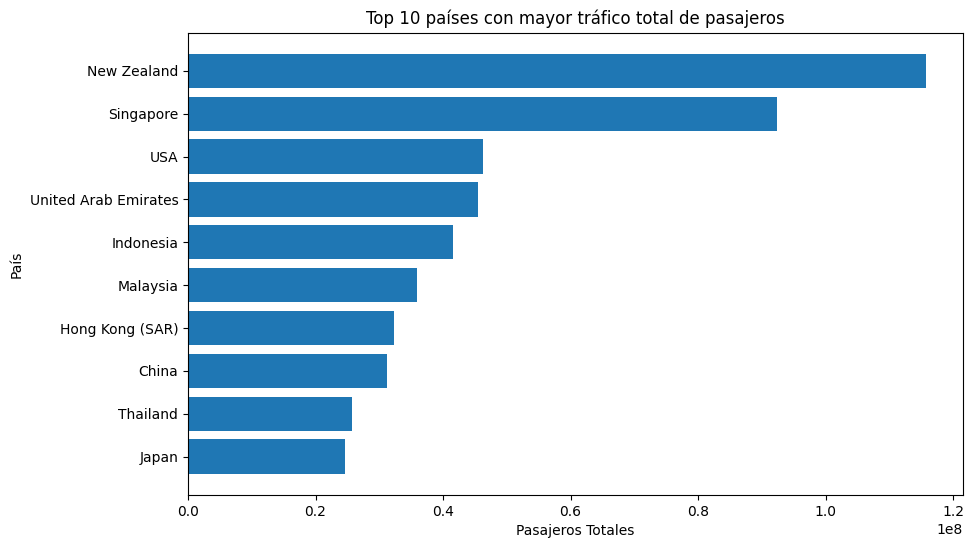

In [ ]:
plt.figure(figsize=(10,6))
#Grafico de barras horizontales con los paises en el eje X y la cantidad de pasajeros en el eje Y
plt.barh(top_countries.index, top_countries.values)
#Nombramos los ejes
plt.xlabel('Pasajeros Totales')
plt.ylabel('País')
#Damos título al gráfico
plt.title('Top 10 países con mayor tráfico total de pasajeros')
#Para poner el país con más tráfico arriba
plt.gca().invert_yaxis()
plt.show()

2° Gráfico: gráfico de línea con la evolución anual de pasajeros entrantes, correo entrante y carga entrante.
Se intenta ahcer un grafico pero al ser los valores de pasajeros mucho mayores, pareciera que los de carga y correo eran nulos y sin variaciones, por eso luego se hace un grafico de lineas ocn 2 ejes Y.

In [ ]:
#Agrupamos por el año y sumamos la cantidad de pasajeros entrantes, correo entrante y carga entrante
pasajeros_anual = df.groupby('Year')['Passengers_In'].sum()
carga_anual = df.groupby('Year')['Freight_In_(tonnes)'].sum()
correo_anual = df.groupby('Year')['Mail_In_(tonnes)'].sum()

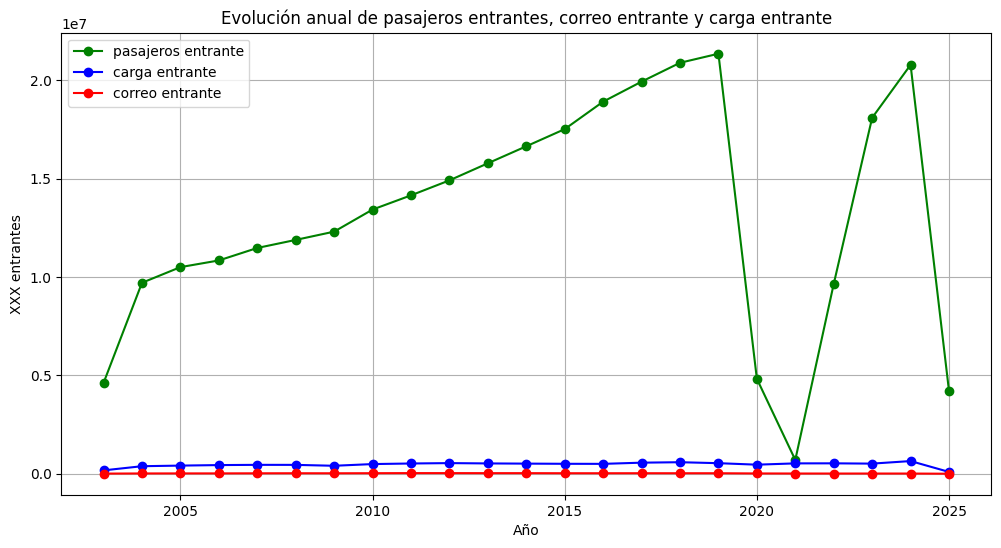

In [ ]:
plt.figure(figsize=(12,6))
#Grafico de linea con el año en el eje X y la cantidad de pasajeros entrantes en el eje Y. Ponemos como marcadores circulos y color de línea verde.
plt.plot(pasajeros_anual.index, pasajeros_anual.values,label="pasajeros entrante", marker='o', linestyle='-', color='green')
plt.plot(carga_anual.index, carga_anual.values, label = "carga entrante", marker='o', linestyle='-', color='blue')
plt.plot(correo_anual.index, correo_anual.values, label="correo entrante" , marker='o', linestyle='-', color='red')
#Damos título al grafico y a los ejes
plt.title('Evolución anual de pasajeros entrantes, correo entrante y carga entrante')
plt.xlabel('Año')
plt.ylabel('XXX entrantes')
plt.legend()
#Mostramos la cuadrícula
plt.grid(True)
plt.show()

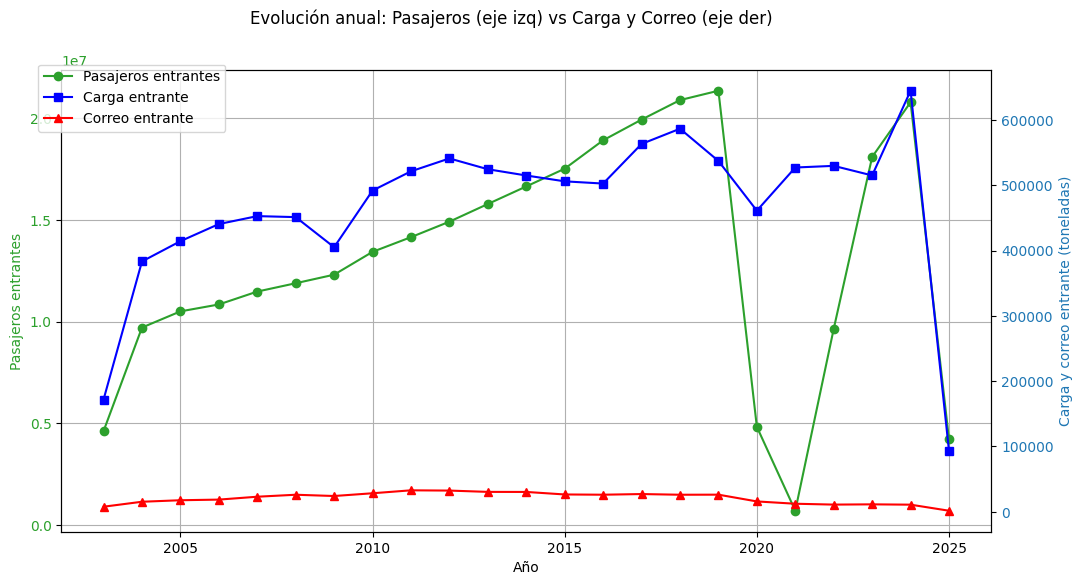

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

# === EJE Y PRINCIPAL (izquierda) ===
color = 'tab:green'
ax1.set_xlabel('Año')
ax1.set_ylabel('Pasajeros entrantes', color=color)
ax1.plot(pasajeros_anual.index,pasajeros_anual.values, color=color, marker='o', label='Pasajeros entrantes')
ax1.tick_params(axis='y', labelcolor=color)

# === EJE Y SECUNDARIO (derecha) ===
ax2 = ax1.twinx()  # crea un segundo eje Y compartiendo el mismo X
color = 'tab:blue'
ax2.set_ylabel('Carga y correo entrante (toneladas)', color=color)
ax2.plot(carga_anual.index,carga_anual.values,  color='blue', marker='s', label='Carga entrante')
ax2.plot(correo_anual.index,correo_anual.values,  color='red', marker='^', label='Correo entrante')
ax2.tick_params(axis='y', labelcolor=color)

# === Título y leyendas ===
fig.suptitle('Evolución anual: Pasajeros (eje izq) vs Carga y Correo (eje der)')
ax1.grid(True)

# Agregar leyendas manualmente combinadas
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

3° Gráfico: gráfico de torta que muestra las proporciones entre "pasajeros" y "carga" para un país específico.

In [ ]:
#Creo un dataset que traiga todo cuando la columna Country sea igual al país en cuestión
pais = df[df['Country'] == 'New Zealand']
#Sumo la columna Passengers_Total
passengers_total = pais['Passengers_Total'].sum()
#Sumo la columna Freight_Total
freight_total = pais['Freight_Total_(tonnes)'].sum()

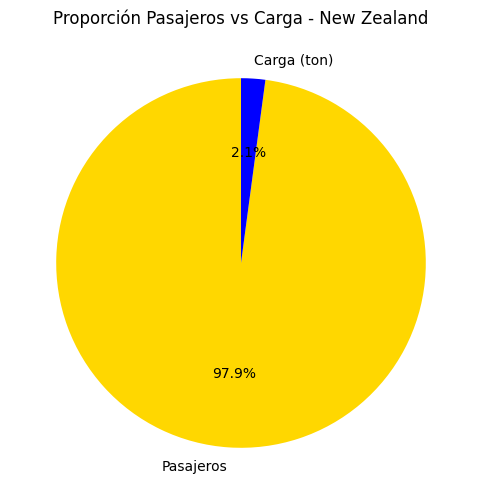

In [ ]:
plt.figure(figsize=(6,6))
#Gráfico de torta con los valores passengers_total y freight_total
plt.pie([passengers_total, freight_total],
        #Títulos a las categorías
        labels=['Pasajeros', 'Carga (ton)'],
        #Mostrar un decimal despues del punto y tambien el simbolo %
        autopct='%1.1f%%',
        startangle=90,
        colors=['gold','blue'])
#Titulo para el grafico
plt.title('Proporción Pasajeros vs Carga - New Zealand')
plt.show()

4° Gráfico: scatterplot que muestra la relación entre pasajeros y carga por país.

In [ ]:
#Agrupa por pais y suma tanto la columna Passengers_total como la Freight_total
pais_agrupado = (df.groupby('Country')[['Passengers_Total','Freight_Total_(tonnes)']]
                   .sum()
                   .reset_index())

#rest.index sirve para que la coluna Country no sea índice, sino que siga siendo una columna normal

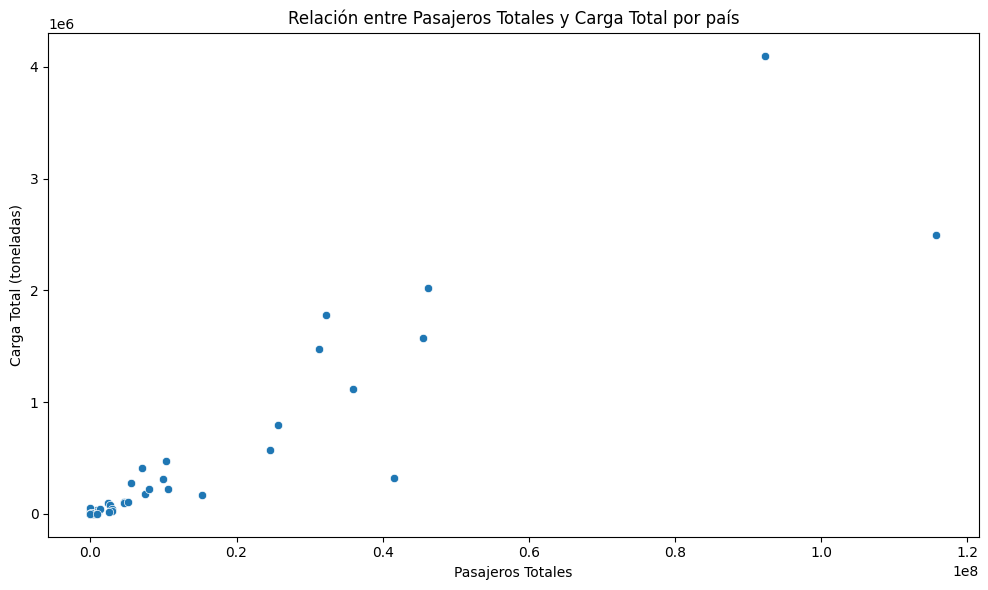

In [ ]:
plt.figure(figsize=(10,6))
#Scatterplot siendo los datos la suma de los pasajeros totales y las cargas totales. Cada punto representa un país.
sns.scatterplot(data=pais_agrupado, x='Passengers_Total', y='Freight_Total_(tonnes)')
#Título a los ejes y al gráfico
plt.title('Relación entre Pasajeros Totales y Carga Total por país')
plt.xlabel('Pasajeros Totales')
plt.ylabel('Carga Total (toneladas)')
plt.show()

5° Gráfico: Histograma para mostrar la distribución de pasajeros salientes.

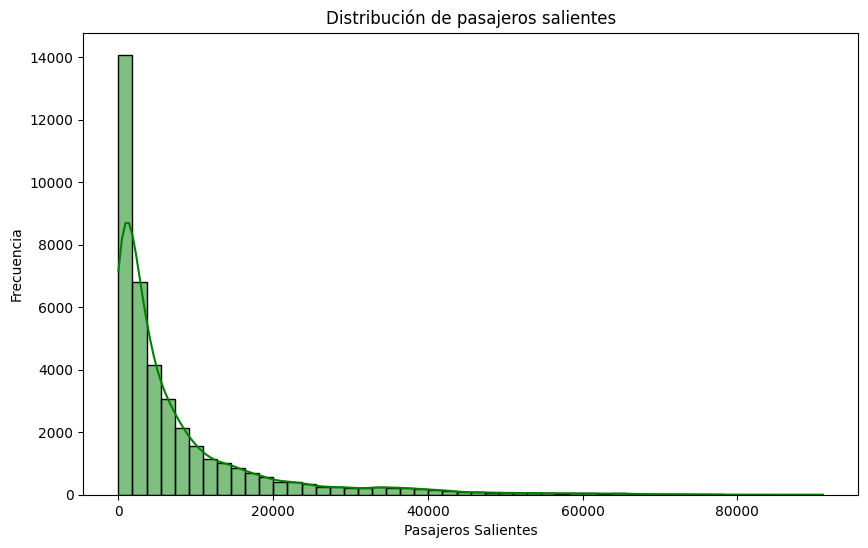

In [ ]:
plt.figure(figsize=(10,6))
#Histograma con 50 bins para la variable Passengers_out. Con kde se agrega una curva suavizada de densidad.
sns.histplot(df['Passengers_Out'], bins=50, kde=True, color='green')
#Nombramos los ejes y el grafico.
plt.title('Distribución de pasajeros salientes')
plt.xlabel('Pasajeros Salientes')
plt.ylabel('Frecuencia')
plt.show()

6° Gráfico: Comparación de pasajeros entrantes por puerto australiano (Boxplot)

In [ ]:
#Seleccionamos los 3 puertos  con mas pasajeros entrantes
top_ports = (df.groupby('AustralianPort')['Passengers_In'].sum()
             .sort_values(ascending=False)
             .head(3)
             .index)

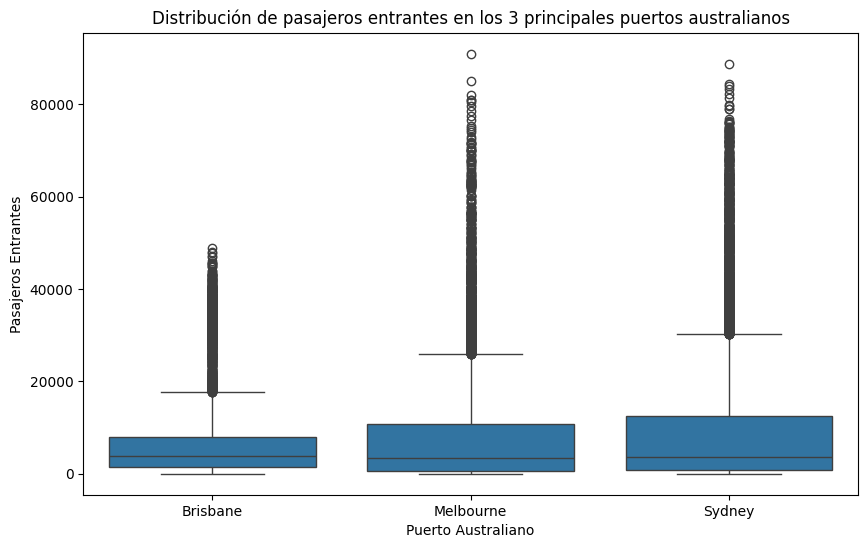

In [ ]:
plt.figure(figsize=(10,6))
#Creamos un boxplot para cada unos de los 3 puertos
sns.boxplot(data=df[df['AustralianPort'].isin(top_ports)],
            x='AustralianPort', y='Passengers_In')
#Damos nombre a ejes y al gráfico
plt.title('Distribución de pasajeros entrantes en los 3 principales puertos australianos')
plt.xlabel('Puerto Australiano')
plt.ylabel('Pasajeros Entrantes')
plt.show()

7° Gráfico: gráfico de línes para mostrar

In [ ]:
#Sacamos el promedio de pasajeros para cada mes.
promedio_mensual = (df.groupby('Month_num')['Passengers_Total']
               .mean()
               .reset_index())

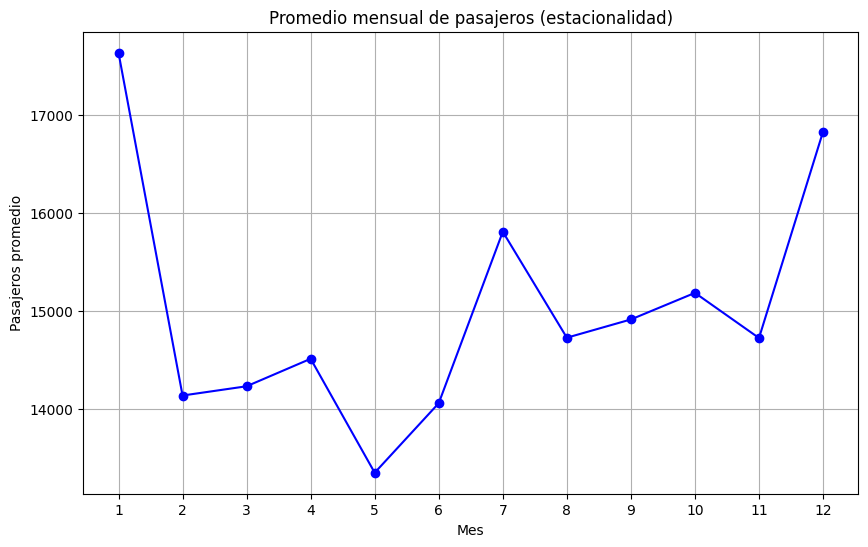

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(
    promedio_mensual['Month_num'],          # eje X: número de mes
    promedio_mensual['Passengers_Total'],   # eje Y: promedio de pasajeros
    marker='o',                        # marcador circular
    linestyle='-',                     # línea continua
    color='blue'                       # color de la línea
)
plt.title('Promedio mensual de pasajeros (estacionalidad)')
plt.xlabel('Mes')
plt.ylabel('Pasajeros promedio')
plt.xticks(range(1,13))                # mostrar de 1 a 12
plt.grid(True)
plt.show()

# **Conlusiones de los Gráficos**

Viendo el gráfico n° 1 podemos ver que los aeropuertos que concentran el mayor volumen son Nueva Zelanda y Singapur, pasando EEUU y los Emiratos Arabes Unidos a un tercer y cuarto puesto, con bastante diferencia.

Viendo el 7° gráfico sabemos que, por haber picos en diciembre y enero, hay mayor tráfico en esos meses, siendo la temporada alta de Australia y confirmando que hay cierta estacionalidad.

Al ver el 2° gráfico vemos que el correo entrante se mantiene practicamente constante en el tiempo, que los pasajeros tuvieron una disminuión muy grande en 2020, y que las cargas se comportan de una manera similar a los pasajeros.

Al ver el 6° grafico vemos que los 3 puertos autralianos que mayor cantidad de pasajeros reciben son Brisabane, Melbourne y Sydney. Podemos destacar que Sydney al tener la caja mas grande, generalmente maneja mas pasajeros que los otros. Tambien vemos que las medianas son silimares. Finalmente, vemos que en Melbourne y Sydney hay muchos outliers muy altos, indicando meses de altísimo tráfico. Es decir, meses en los que el número de pasajeros entrantes fue mucho mayor que lo habitual.

# Encoding
Acá comienza la 2da etapa del proyecto. Por practicidad recomendamos empezar a trabajara desde acá importando ya el dataset procesado.

#Librerías


In [ ]:
#Librerías
import pandas as pd
import numpy as np

#Dataset procesado
#https://docs.google.com/spreadsheets/d/1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24/edit?usp=drive_link&ouid=111276291667579032368&rtpof=true&sd=true

!gdown 1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24

#Asociamos el dataset procesado a la variable df
df = pd.read_excel('df_procesado_v1.xlsx')

Downloading...
From: https://drive.google.com/uc?id=1cMZG8QEfMf0_px8LnzBIB5OWeqLbsh24
To: /content/df_procesado_v1.xlsx
100% 2.99M/2.99M [00:00<00:00, 49.6MB/s]


In [ ]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Feb-25,Adelaide,Auckland,New Zealand,2306,7.419,0.000,2253,4.537,0.0,4559,11.956,0.000,2025,2
1,Feb-25,Adelaide,Denpasar,Indonesia,6221,0.768,0.000,5840,0.000,0.0,12061,0.768,0.000,2025,2
2,Feb-25,Adelaide,Doha,Qatar,7183,174.422,0.001,4563,206.989,0.0,11746,381.411,0.001,2025,2
3,Feb-25,Adelaide,Dubai,United Arab Emirates,5575,96.674,0.000,3037,266.805,1.7,8612,363.479,1.700,2025,2
4,Feb-25,Adelaide,Guangzhou,China,3160,298.834,0.000,3170,209.045,0.0,6330,507.879,0.000,2025,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   40000 non-null  object 
 1   AustralianPort          40000 non-null  object 
 2   ForeignPort             40000 non-null  object 
 3   Country                 40000 non-null  object 
 4   Passengers_In           40000 non-null  int64  
 5   Freight_In_(tonnes)     40000 non-null  float64
 6   Mail_In_(tonnes)        40000 non-null  float64
 7   Passengers_Out          40000 non-null  int64  
 8   Freight_Out_(tonnes)    40000 non-null  float64
 9   Mail_Out_(tonnes)       40000 non-null  float64
 10  Passengers_Total        40000 non-null  int64  
 11  Freight_Total_(tonnes)  40000 non-null  float64
 12  Mail_Total_(tonnes)     40000 non-null  float64
 13  Year                    40000 non-null  int64  
 14  Month_num               40000 non-null

Algo que se hará en primer lugar es dropear la columna que tiene el mes y año en formato objecto, ya que al final tenemos dos columnas que nos dan ambos valores numéricamente.

In [ ]:
#Eliminamos la primera que contenía todo junto
df = df.drop(columns=["Month"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AustralianPort          40000 non-null  object 
 1   ForeignPort             40000 non-null  object 
 2   Country                 40000 non-null  object 
 3   Passengers_In           40000 non-null  int64  
 4   Freight_In_(tonnes)     40000 non-null  float64
 5   Mail_In_(tonnes)        40000 non-null  float64
 6   Passengers_Out          40000 non-null  int64  
 7   Freight_Out_(tonnes)    40000 non-null  float64
 8   Mail_Out_(tonnes)       40000 non-null  float64
 9   Passengers_Total        40000 non-null  int64  
 10  Freight_Total_(tonnes)  40000 non-null  float64
 11  Mail_Total_(tonnes)     40000 non-null  float64
 12  Year                    40000 non-null  int64  
 13  Month_num               40000 non-null  int64  
dtypes: float64(6), int64(5), object(3)
mem

Vamos a usar ahora Label Encoder para las columnas AustralianPort, ForeignPort y Country.

In [ ]:
#df['AustralianPort'].value_counts()
#df['ForeignPort'].value_counts()
df['Country'].value_counts()

,count
Country,
New Zealand,5528
USA,4055
China,3968
Indonesia,2442
Japan,2128
...,...
Botswana,1
Uruguay,1
Kenya,1


In [ ]:
#LabelEncoder using sklearn para COLUMNA AUSTRALIAN PORT
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
AusPort_label = encoder.fit_transform(df['AustralianPort'])
encoded_ausport = pd.DataFrame(AusPort_label, columns=['AustralianPort_Codificado'])
encoded_ausport.tail()

,AustralianPort_Codificado
39995,3
39996,3
39997,3
39998,3
39999,3


In [ ]:
#LabelEncoder using sklearn para COLUMNA FOREIGN PORT
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ForPort_label = encoder.fit_transform(df['ForeignPort'])
encoded_forport = pd.DataFrame(ForPort_label, columns=['ForeignPort_Codificado'])
encoded_forport.tail()

,ForeignPort_Codificado
39995,12
39996,47
39997,52
39998,62
39999,102


In [ ]:
#LabelEncoder using sklearn para COLUMNA COUNTRY
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Country_label = encoder.fit_transform(df['Country'])
encoded_country = pd.DataFrame(Country_label, columns=['Country_Codificado'])
encoded_country.tail()

,Country_Codificado
39995,38
39996,24
39997,17
39998,18
39999,24


In [ ]:
#Concatenar las codificaciónes
df_concatenado = pd.concat([df, encoded_ausport, encoded_forport, encoded_country], axis=1)
df_concatenado.head()

,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num,AustralianPort_Codificado,ForeignPort_Codificado,Country_Codificado
0,Adelaide,Auckland,New Zealand,2306,7.419,0.000,2253,4.537,0.0,4559,11.956,0.000,2025,2,0,12,38
1,Adelaide,Denpasar,Indonesia,6221,0.768,0.000,5840,0.000,0.0,12061,0.768,0.000,2025,2,0,38,21
2,Adelaide,Doha,Qatar,7183,174.422,0.001,4563,206.989,0.0,11746,381.411,0.001,2025,2,0,40,46
3,Adelaide,Dubai,United Arab Emirates,5575,96.674,0.000,3037,266.805,1.7,8612,363.479,1.700,2025,2,0,41,59
4,Adelaide,Guangzhou,China,3160,298.834,0.000,3170,209.045,0.0,6330,507.879,0.000,2025,2,0,53,10


In [ ]:
#Dropeamos asi queda todo numérico
df_codificado = df_concatenado.drop(['AustralianPort', 'ForeignPort', 'Country', 'Passengers_Total', 'Freight_Total_(tonnes)','Mail_Total_(tonnes)'], axis=1) #Explicacion de estos dropeos en la conclusión
df_codificado.head()

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,AustralianPort_Codificado,ForeignPort_Codificado,Country_Codificado
0,2306,7.419,0.000,2253,4.537,0.0,2025,2,0,12,38
1,6221,0.768,0.000,5840,0.000,0.0,2025,2,0,38,21
2,7183,174.422,0.001,4563,206.989,0.0,2025,2,0,40,46
3,5575,96.674,0.000,3037,266.805,1.7,2025,2,0,41,59
4,3160,298.834,0.000,3170,209.045,0.0,2025,2,0,53,10


#Análisis de Correlación

Al tener ahora todos valores numéricos es posible hacer análisis de correlación.

In [ ]:
corr = df_codificado.corr()
corr

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,AustralianPort_Codificado,ForeignPort_Codificado,Country_Codificado
Passengers_In,1.000000,0.713830,0.543383,0.981952,0.744862,0.503752,0.073477,-0.009856,0.127312,-0.050317,0.077470
Freight_In_(tonnes),0.713830,1.000000,0.546317,0.712959,0.769160,0.434756,0.052133,0.027777,0.222880,-0.006208,0.105974
Mail_In_(tonnes),0.543383,0.546317,1.000000,0.552432,0.491530,0.500979,-0.039425,0.027842,0.209945,0.034220,0.083065
Passengers_Out,0.981952,0.712959,0.552432,1.000000,0.744900,0.516995,0.071151,0.021617,0.129743,-0.054839,0.078485
Freight_Out_(tonnes),0.744862,0.769160,0.491530,0.744900,1.000000,0.506460,0.084344,0.010493,0.115202,-0.021472,0.060883
Mail_Out_(tonnes),0.503752,0.434756,0.500979,0.516995,0.506460,1.000000,-0.013394,0.046502,0.128042,-0.027724,0.113387
Year,0.073477,0.052133,-0.039425,0.071151,0.084344,-0.013394,1.000000,-0.055246,0.010700,0.016857,-0.017805
Month_num,-0.009856,0.027777,0.027842,0.021617,0.010493,0.046502,-0.055246,1.000000,0.002408,-0.001850,0.000496
AustralianPort_Codificado,0.127312,0.222880,0.209945,0.129743,0.115202,0.128042,0.010700,0.002408,1.000000,0.011846,-0.017507
ForeignPort_Codificado,-0.050317,-0.006208,0.034220,-0.054839,-0.021472,-0.027724,0.016857,-0.001850,0.011846,1.000000,-0.108640


Vemos que de esta forma cuesta ver a simple vista los valores cercanos a 1, o con "alta correlación". Para ello hacemos el siguiente gráfico:

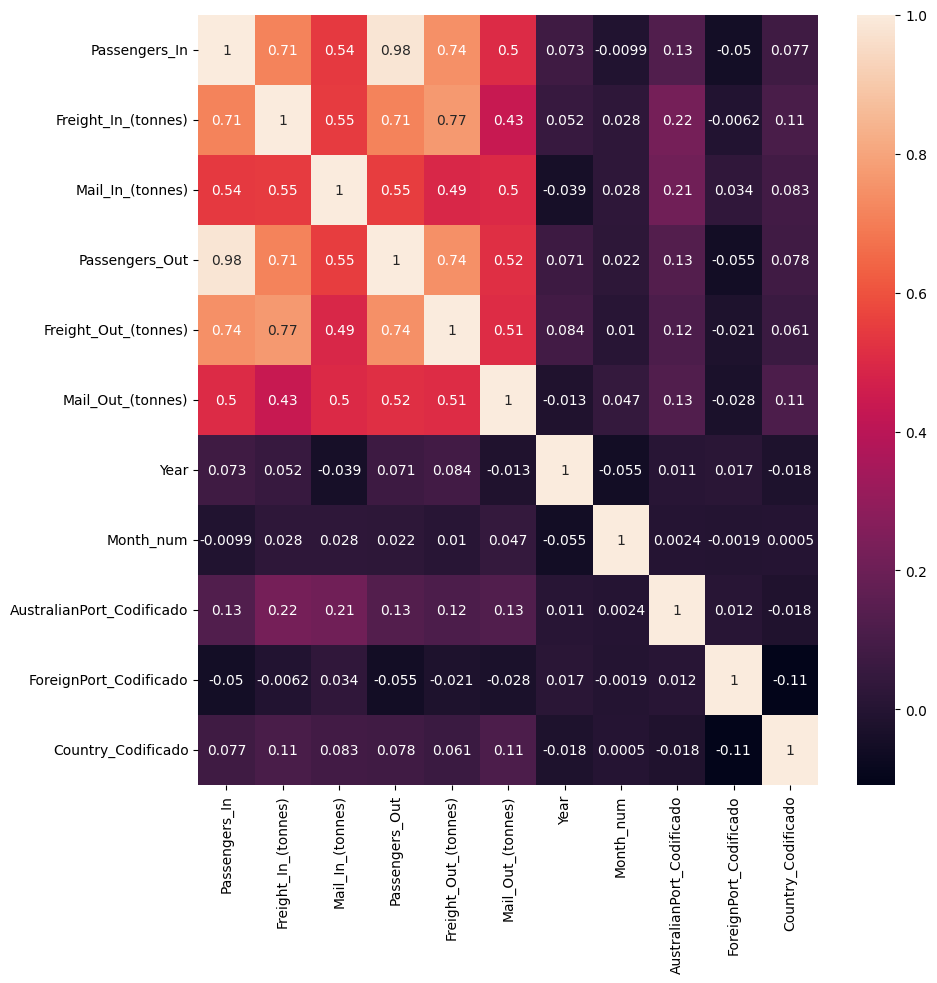

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
corr = df_codificado.corr()
sns.heatmap(corr, annot=True)
plt.show()

#Exportación del DataSet CODIFICADO

In [ ]:
Data_Codificada_V1 = df_codificado.copy()

In [ ]:
Data_Codificada_V1.to_excel('Data_Codificada_V1.xlsx', index=False)

In [ ]:
from google.colab import files
files.download('Data_Codificada_V1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Modelo de Aprendizaje - Regresión
Se elegirá la variable objetivo "Passengers_In" con la que se podrá predecir el número de pasajeros en un vuelo/mes/aeropuerto/país.

Por ende, los 2 algoritmos que se elegirán para entrenar serán Modelos de Regresión.

In [ ]:
#Se descarga el dataset codificado para facilidad
!gdown 1harfWRbGhPH5S0ol3ITPz7iqas9VMzff

Downloading...
From: https://drive.google.com/uc?id=1harfWRbGhPH5S0ol3ITPz7iqas9VMzff
To: /content/Data_Codificada_V1.xlsx
100% 2.13M/2.13M [00:00<00:00, 54.4MB/s]


In [ ]:
#Dataset
df = pd.read_excel('Data_Codificada_V1.xlsx')
df.head()

,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Year,Month_num,AustralianPort_Codificado,ForeignPort_Codificado,Country_Codificado
0,2306,7.419,0.000,2253,4.537,0.0,2025,2,0,12,38
1,6221,0.768,0.000,5840,0.000,0.0,2025,2,0,38,21
2,7183,174.422,0.001,4563,206.989,0.0,2025,2,0,40,46
3,5575,96.674,0.000,3037,266.805,1.7,2025,2,0,41,59
4,3160,298.834,0.000,3170,209.045,0.0,2025,2,0,53,10


#Selección de Variables


In [ ]:
X = df.drop('Passengers_In',  axis=1).values #Elimino de mi dataset la variable a predecir

y = df['Passengers_In'].values #Defino el Target

In [ ]:
#Validamos el primer registro
X[0:1]

array([[7.419e+00, 0.000e+00, 2.253e+03, 4.537e+00, 0.000e+00, 2.025e+03,
        2.000e+00, 0.000e+00, 1.200e+01, 3.800e+01]])

In [ ]:
#Validamos el primer registro
y[0:1]

array([2306])

#Algoritmo Regresión Lineal

In [ ]:
# Dividir los datos en conjuntos de entrenamiento (TRAIN) y prueba (TEST)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=0)

X TRAIN: valores para entrenar el modelo.
X TEST: valores reservados para testear el modelo.
y TRAIN: valores de la variable objetivo correpsonidentes a X TRAIN.
y TEST: valores de la variable objetivo correpsonidentes a X TEST.

In [ ]:
#Datos X_train
X_train1

array([[0.00000e+00, 0.00000e+00, 1.05500e+03, ..., 1.50000e+01,
        1.20000e+01, 3.80000e+01],
       [3.48270e+01, 4.58200e+00, 3.75000e+03, ..., 1.60000e+01,
        1.44000e+02, 5.30000e+01],
       [8.10500e+00, 0.00000e+00, 1.54900e+03, ..., 3.00000e+00,
        1.20000e+01, 3.80000e+01],
       ...,
       [6.28769e+02, 2.29420e+01, 8.18500e+03, ..., 1.60000e+01,
        1.33000e+02, 1.00000e+01],
       [1.60630e+01, 5.69000e-01, 3.82800e+03, ..., 1.00000e+00,
        6.40000e+01, 5.80000e+01],
       [1.25798e+02, 1.72300e+00, 3.47120e+04, ..., 1.00000e+01,
        3.80000e+01, 2.10000e+01]])

In [ ]:
#Datos X_test
X_test1

array([[5.41850e+01, 0.00000e+00, 1.68900e+03, ..., 1.60000e+01,
        2.70000e+01, 1.00000e+01],
       [2.31917e+02, 2.33120e+01, 1.43550e+04, ..., 1.00000e+01,
        4.00000e+01, 4.60000e+01],
       [2.13000e-01, 0.00000e+00, 1.46000e+02, ..., 1.20000e+01,
        1.20000e+01, 3.80000e+01],
       ...,
       [1.02721e+02, 0.00000e+00, 5.03000e+02, ..., 1.60000e+01,
        1.11000e+02, 2.40000e+01],
       [4.93536e+02, 3.17830e+01, 1.16000e+04, ..., 1.00000e+00,
        6.20000e+01, 1.90000e+01],
       [1.77420e+01, 0.00000e+00, 1.34300e+04, ..., 1.00000e+01,
        1.56000e+02, 3.80000e+01]])

In [ ]:
#Datos y_train
y_train1

array([ 1229,  5483,  1380, ...,  6691,  2872, 35878])

In [ ]:
#Datos y_test
y_test1

array([ 1856, 12737,   140, ...,   259, 10057, 10912])

In [ ]:
#Cantidad de Datos Parciales
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((24000, 10), (16000, 10), (24000,), (16000,))

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
regressor.intercept_

np.float64(1015.0020460821115)

In [ ]:
regressor.coef_

array([  0.37374545,  -0.35929564,   0.97872384,   0.52046079,
        -5.44378774,  -0.15457285, -97.78591917,  -4.12556612,
         0.5412256 ,   0.87572801])

In [ ]:
#Realizando las predicciones
y_pred1 = regressor.predict(X_test1)

In [ ]:
dfpred1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1}).reset_index(drop=True)
dfpred1

,Actual,Predicted
0,1856,2149.035764
1,12737,13883.969067
2,140,639.968193
3,1205,1351.122715
4,23646,24253.712633
...,...,...
15995,0,9.603180
15996,112,689.854179
15997,259,666.984483
15998,10057,11790.809370


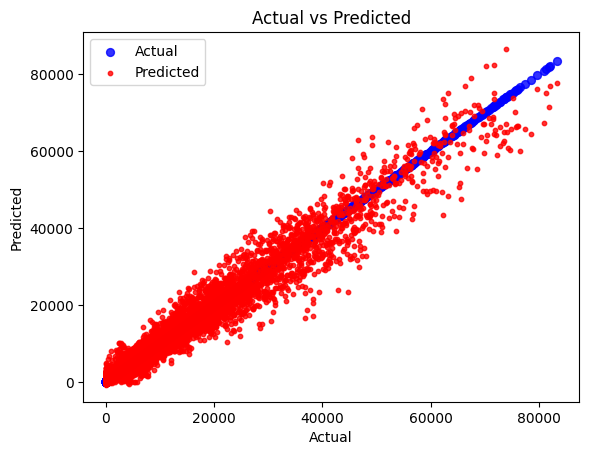

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dfpred1['Actual'], dfpred1['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(dfpred1['Actual'], dfpred1['Predicted'], color='red', label='Predicted', s=10, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
#Evaluación de Modelos
#Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)
from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test1,y_pred1))

El MSE es: 4210013.07319545


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)
from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

El RMSE es: 2051.831638608648


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)
from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test1,y_pred1))

El MAE es: 1088.5607049979726


In [ ]:
#R Cuadrado
from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test1,y_pred1))

El R^2 es: 0.9655089921474641


#Algoritmo Random Regressor

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
#Cantidad de Datos Parciales
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((24000, 10), (16000, 10), (24000,), (16000,))

In [ ]:
#Aplicacion del algoritmo
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
#Realizando las predicciones
y_pred2 = regr.predict(X_test2)

In [ ]:
dfpred2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2}).reset_index(drop=True)
dfpred2

,Actual,Predicted
0,1856,2266.164950
1,12737,11499.482593
2,140,2266.164950
3,1205,2266.164950
4,23646,27981.193354
...,...,...
15995,0,2266.164950
15996,112,2266.164950
15997,259,2266.164950
15998,10057,11499.482593


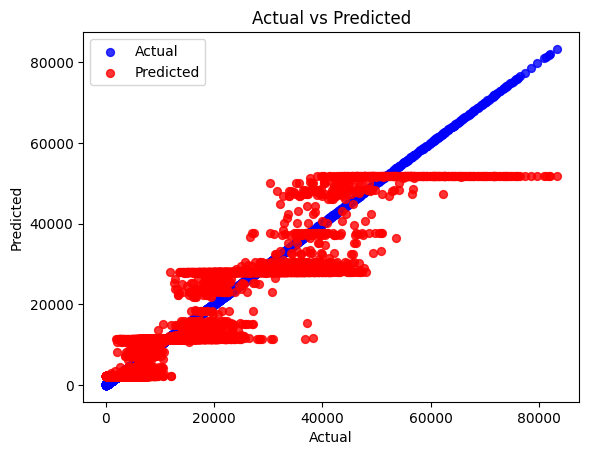

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(dfpred2['Actual'], dfpred2['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(dfpred2['Actual'], dfpred2['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)


plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
#Calculo de Metricas
# Error Cuadratico Medio (Promedio del cuadrado de los errores entre los valores reales y predichos)
from sklearn.metrics import mean_squared_error
print('El MSE es:',mean_squared_error(y_test2,y_pred2))

El MSE es: 12223600.094037151


In [ ]:
# Raiz de Error Cuadratico medio (Raiz cuadrada de la distancia cuadratica promedio entre los valores reales y predichos)
from sklearn import metrics
import numpy as np
print('El RMSE es:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

El RMSE es: 3496.2265507311095


In [ ]:
#Error Promedio Absoluto (Calcula como la media absoluta entre los valores reales y predichos)
from sklearn.metrics import mean_absolute_error
print('El MAE es:',mean_absolute_error(y_test2,y_pred2))

El MAE es: 2428.9396865456492


In [ ]:
# R Cuadrado
from sklearn.metrics import r2_score
print('El R^2 es:',r2_score(y_test2,y_pred2))

El R^2 es: 0.8998567749079004


#CONCLUSIONES

Los resultados son:


*   Linear Regression
        1. MSE: 4,2 millones
        2. RMSE: 2.051 pasajeros
        3. MAE: 1.088 pasajeros
        4. R²: 0.966

*   Random Regressor
        1. MSE: 12,2 millones
        2. RMSE: 3.496 pasajeros
        3. MAE: 2.429 pasajeros
        4. R²: 0.90

Viendo estos resultados podemos ver que el algoritmo de Regresión Lineal es mejor, en este caso, que el Random Regressor.

Imagino que esto nos dice que la relación entre las variables predictoras y los pasajerosIN es predominantemente lineal, y que un modelo sencillo es mas efectivo que uno más complejo.

Lo que si queiro destacar es que el gráfico de regresion lineal pareciera que tiene una dispersión alta, que puede llegar a sugerir que faltan factores que se dejaron fuera del análisis o del dataset orginial como eventos especiales, estacionalidades, etc.


Aclaro que hubo algo que tuve que cambiar luego de investigar ya que al probar inicialmente el modelo, se habian dejado tanto las columnas de IN, las de OUT y las de TOTAL. Esto daba que hubieran varias columnas con correlación 1. Eso segun lo investigado genera data leakage porque el modelo ya “sabía” el resultado. Es cuando, sin querer, le das al modelo información que no debería tener en el momento de hacer predicciones. En otras palabras: el modelo aprende con “trampa” porque ve datos que en la vida real no tendría. Esto generaba que el R² = 1 y el modelo parecia totalmente overfitteado.

Por esto es que, cuando se dropean las columnas que se encodean, tambien se dropean las columnas de TOTALES.

Muchas gracias!